## **Research Question 2:What are the rating/sales trends in video games**
### **Part 1: Rating/Sales trends over time.**
### **Part 2: Rating/Sales trend by Genre.**
### **Part 3: Rating/Sales trend by ESRB Rating.**
### **Part 4: Rating/Sales trend by Developer.**
### **Part 5: What is the most popular Platform.**

## **Datasets**
 * year.csv - dataset we made in 300-RQ2.ipynb
 * genre.csv - dataset we made in 300-RQ2.ipynb
 * ESRB.csv - dataset we made in 300-RQ2.ipynb
 * developer.csv - dataset we made in 400-RQ2.ipynb
 * platform7.csv - dataset we made in 500-RQ2.pynb
 * platform8.csv - dataset we made in 500-RQ2.pynb

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

In [2]:
sns.set_context("talk", font_scale=1.4)

In [3]:
df1= pd.read_csv('../data/analysis/year.csv')
df2 = pd.read_csv('../data/analysis/genre.csv')
df3 = pd.read_csv('../data/analysis/ESRB.csv')
df4 = pd.read_csv('../data/analysis/developer.csv')
df5 = pd.read_csv('../data/analysis/platform7.csv')
df6 = pd.read_csv('../data/analysis/platform8.csv')

### **Rating/Sales trends over time.**

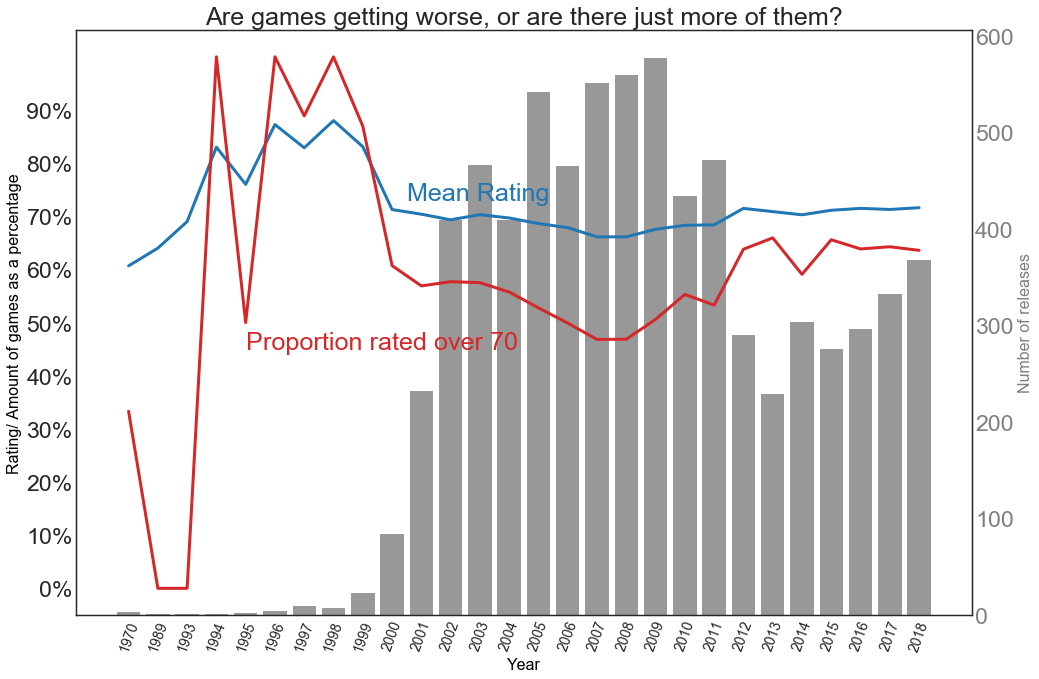

In [22]:
rating_threshold = 70
years = []
proportions = []
totals = []
avg_ratings = []
max_ratings = []

# calculate values for plotting
for year in sorted(df1['release_year'].unique()):
    
    year_data = df1[df1['release_year'] == year]
    total = year_data.shape[0]
    n_high_rating = year_data[year_data['meta_critic_score'] >= rating_threshold].shape[0]
    avg_rating = year_data['meta_critic_score'].mean() / 100
    
    years.append(year)
    totals.append(total)
    proportions.append(n_high_rating/total)
    avg_ratings.append(avg_rating)
    
    # print(f'{year} | {n_high_rating/total:.2f}')
    
fig, ax1 = plt.subplots(figsize=(15,10))


# ensure lines drawn over bars
ax1.set_zorder(1)
ax1.patch.set_visible(False)

# plot trendlines
ax1.plot(avg_ratings, color='tab:blue', label='Average Rating', linewidth=3)
ax1.plot(proportions, color='tab:red', label=f'Proportion of games rated over {rating_threshold}', linewidth=3)

x_pos = np.arange(len(years))
ax1.set_xticks(x_pos)
ax1.set_xticklabels(years, fontsize=14,rotation=70)
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%','90%'])
ax1.set_ylabel('Rating/ Amount of games as a percentage', color='black', fontsize=16)
ax1.set_xlabel('Year', color='black', fontsize=16)
# instead of legend, place text directly over lines
ax1.text(9.5, 0.73, 'Mean Rating', color='tab:blue')
ax1.text(4., 0.45, 'Proportion rated over 70', color='tab:red')
# ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.1))

# allow multiple axis on same plot
ax2 = ax1.twinx()

# plot number of releases by year
color = 'tab:gray'
ax2.bar(x_pos, totals, color=color, alpha=.8)

ax2.set_ylabel('Number of releases', color=color, fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Are games getting worse, or are there just more of them?')

fig.tight_layout()
plt.show()

This shows that the number of console games increased significantly after the 90's but has seen a decrease in recent years. I think this is due to the increase in mobile gaming. A lot of developers are now, not only developing console games but also mobile games. In 2008 apple launched its app store and google launched the play store and as you can see from this graph, the number of console games decreased shorly after. The average rating of games fluctuated quite a lot early on but thats probably due to the lower number of games. It seems the have stayed pretty consistant since 2000, fluctuating sligtly above or below the 70.

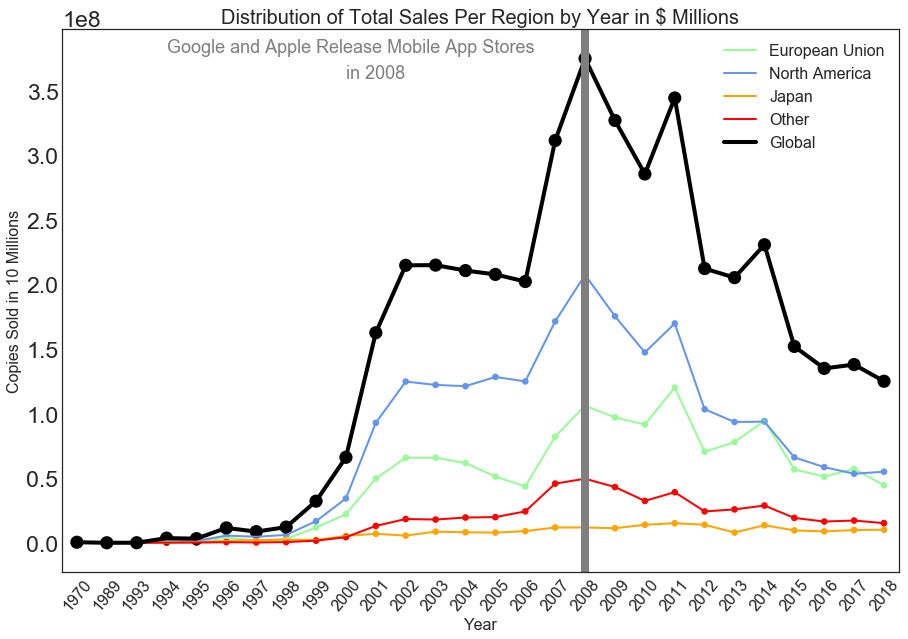

In [28]:
EU = df1.pivot_table('eu_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
NA = df1.pivot_table('na_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
JP = df1.pivot_table('jp_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
Other = df1.pivot_table('other_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
Global = df1.pivot_table('global_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
years = Global.index.astype(int)
regions = ['European Union','North America','Japan','Other','Global']

plt.figure(figsize=(15,10))
ax = sns.pointplot(x=years, y=EU, color='palegreen', scale=0.5)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.5)
ax = sns.pointplot(x=years, y=JP, color='orange', scale=0.5)
ax = sns.pointplot(x=years, y=Other, color='red', scale=0.5)
ax = sns.pointplot(x=years, y=Global, color='black', scale=1)
ax.set_xticklabels(labels=years, fontsize=16, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Copies Sold in 10 Millions', fontsize=16)
ax.set_title(label='Distribution of Total Sales Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=16)

ax.axvline(17,color='tab:grey',linewidth=8)
ax.text(3, 380000000, 'Google and Apple Release Mobile App Stores', color='tab:grey',fontsize=18)
ax.text(9, 360000000, 'in 2008', color='tab:grey',fontsize=18)
plt.show();

### **Rating/Sales trend by Genre.**

In [11]:
df2.head()

,Genre,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
0,Action,927350000.0,1538,101282,10720.5,602958.387516,65.9,7.0
1,Sports,644390000.0,919,67032,6198.8,701186.071817,72.9,6.7
2,Shooter,640530000.0,749,52674,5212.7,855180.240320,70.3,7.0
3,Racing,352950000.0,640,43838,4421.5,551484.375000,68.5,6.9
4,Misc,304650000.0,475,32006,3206.5,641368.421053,67.4,6.8


In [14]:
df2.describe()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3.186200e+08,557.615385,38554.384615,3902.507692,524100.818024,69.553846,7.007692
std,2.641147e+08,370.838361,24859.427496,2569.817045,182302.945486,2.039859,0.213937
min,4.691000e+07,156.000000,10752.000000,1073.600000,196041.666667,65.900000,6.700000
25%,1.352900e+08,263.000000,18260.000000,1841.600000,438338.762215,68.500000,6.900000
50%,2.532600e+08,516.000000,34873.000000,3664.700000,489422.632794,69.400000,7.000000
75%,3.529500e+08,640.000000,44169.000000,4564.800000,641368.421053,71.100000,7.100000
max,9.273500e+08,1538.000000,101282.000000,10720.500000,855180.240320,72.900000,7.400000


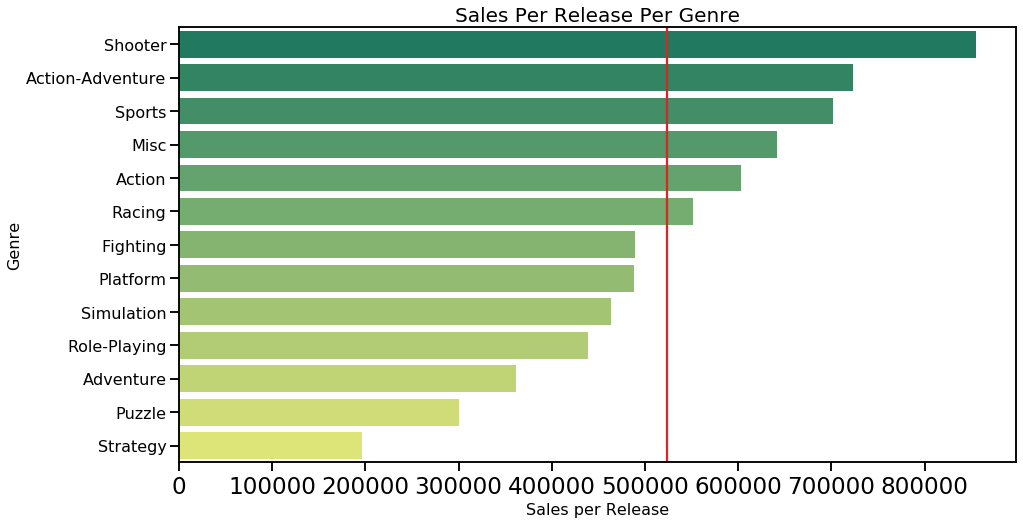

In [11]:
data =  df2.sort_values(by='Sales Per Release',ascending=False)
genres = data.Genre

colors = sns.color_palette("summer", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Sales Per Release', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Sales per Release', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Sales Per Release Per Genre', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=16)

mean=data['Sales Per Release'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

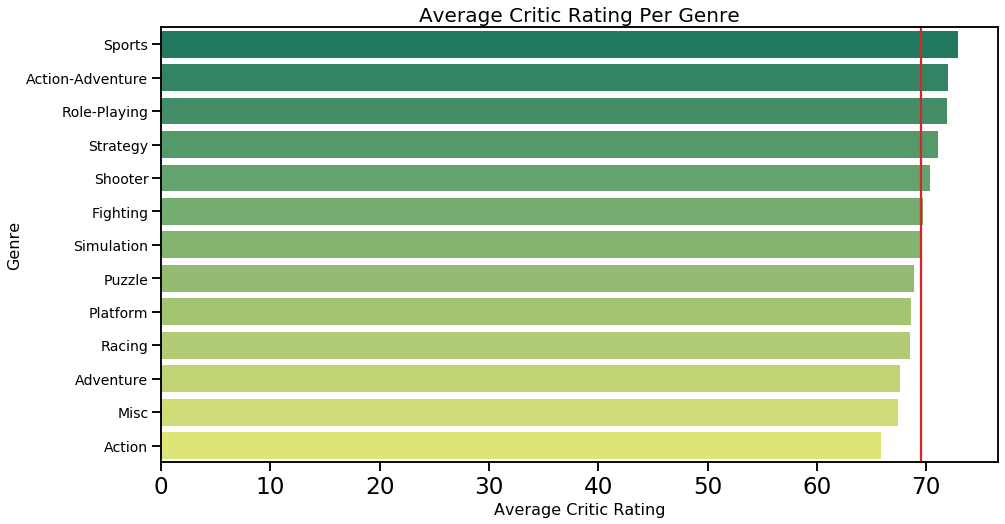

In [12]:
data = df2.sort_values(by='Average Critic Rating',ascending=False)
genres = data.Genre

colors = sns.color_palette("summer", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Average Critic Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Critic Rating', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Average Critic Rating Per Genre', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)

mean=data['Average Critic Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

Shooter has the highest number of sales per release. I feel as though this graph tells a good story of genres are easier to make good games for on console.Sports, Action-Adventure, Role-playing, Strategy, Shooter and Fighting are all above average with Sports games having the overall best average rating. Its very surprising to see Action games have the worst average rating considering that they were high up in the sales per release chart.

### **Rating/Sales trend by ESRB Rating.**

In [15]:
df3.head()

,ESRB,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
0,M,1.263510e+09,1521,107985,10810.0,830710.059172,71.0,7.1
1,E,1.197500e+09,2156,148910,14913.2,555426.716141,69.1,6.9
2,T,1.152270e+09,2458,168886,17506.3,468783.563873,68.7,7.1
3,E10+,5.287800e+08,1114,75426,7503.1,474667.863555,67.7,6.7


In [16]:
df3.describe()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
count,4.000000e+00,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000
mean,1.035515e+09,1812.250000,125301.750000,12683.15000,582397.050685,69.125000,6.950000
std,3.408973e+08,607.600952,41810.670826,4418.80481,170196.309473,1.381726,0.191485
min,5.287800e+08,1114.000000,75426.000000,7503.10000,468783.563873,67.700000,6.700000
25%,9.963975e+08,1419.250000,99845.250000,9983.27500,473196.788634,68.450000,6.850000
50%,1.174885e+09,1838.500000,128447.500000,12861.60000,515047.289848,68.900000,7.000000
75%,1.214002e+09,2231.500000,153904.000000,15561.47500,624247.551899,69.575000,7.100000
max,1.263510e+09,2458.000000,168886.000000,17506.30000,830710.059172,71.000000,7.100000


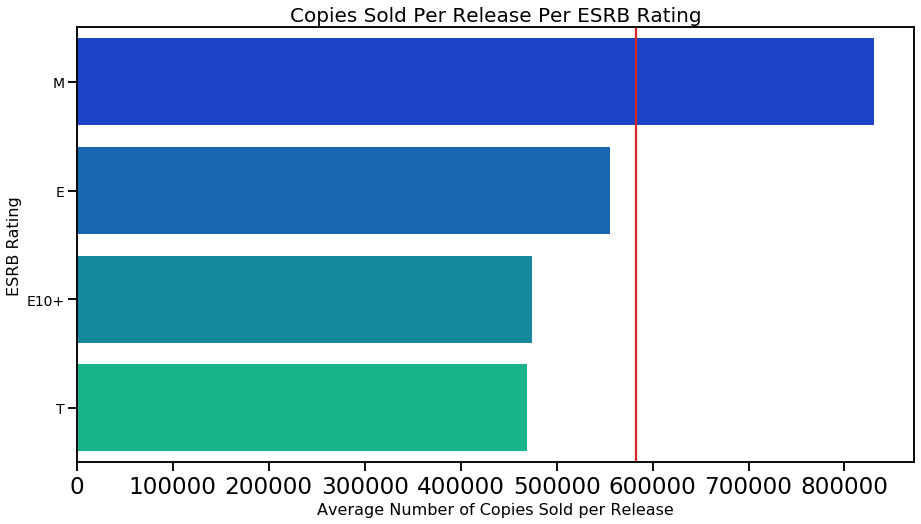

In [13]:
data = df3.sort_values(by='Sales Per Release',ascending=False)
esrb = data.ESRB

colors = sns.color_palette("winter", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = esrb , x = 'Sales Per Release', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Number of Copies Sold per Release', fontsize=16)
ax.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax.set_title(label='Copies Sold Per Release Per ESRB Rating', fontsize=20)
ax.set_yticklabels(labels = esrb, fontsize=14)
#ax.set_xticklabels(labels= data['Sales Per Release'], fontsize=14)

mean=data['Sales Per Release'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

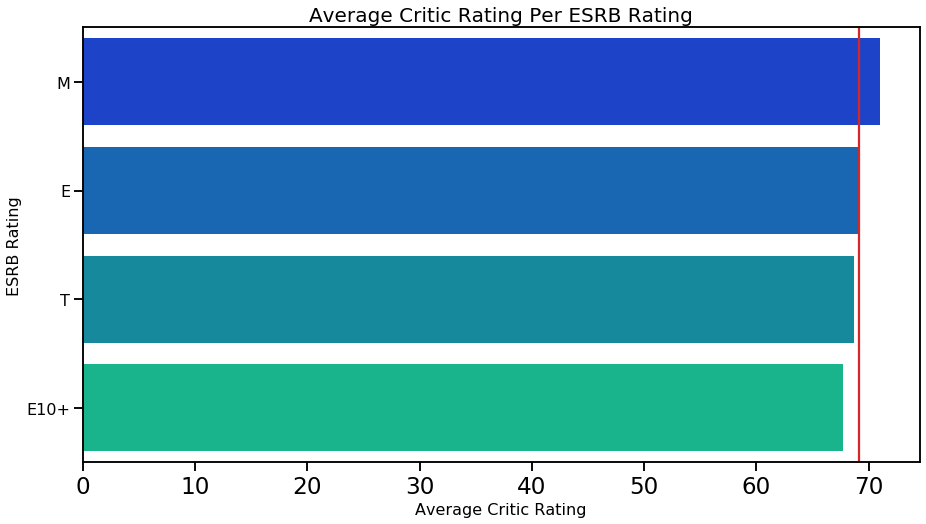

In [14]:
data = df3.sort_values(by='Average Critic Rating',ascending=False)
genres = data.ESRB

colors = sns.color_palette("winter", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Average Critic Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Critic Rating', fontsize=16)
ax.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax.set_title(label='Average Critic Rating Per ESRB Rating', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=16)

mean=data['Average Critic Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

As expected M (Mature) has the highest number of copies sold per release. This isnt surprising as people in this age category are more likely to be able to afford video games and don’t need permission from anyone to do so. M (Mature) is top with an average rating of about 73. E10+ (everbody 10 and over) has the worst average rating of about 67.

### **Rating/Sales trend by Developer.**

In [15]:
df4.head()

,Developer,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
0,EA Canada,175920000.0,190,14594,1286.1,9.258947e+05,76.8,6.8,very good
1,Ubisoft Montreal,157670000.0,133,9730,930.2,1.185489e+06,73.2,7.0,good
2,Traveller's Tales,133840000.0,134,9568,971.6,9.988060e+05,71.4,7.3,good
3,EA Tiburon,127010000.0,133,10156,871.6,9.549624e+05,76.4,6.6,very good
4,Rockstar North,106630000.0,14,1255,113.9,7.616429e+06,89.6,8.1,excellent


In [16]:
df4.describe()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
count,1.459000e+03,1459.000000,1459.000000,1459.000000,1.459000e+03,1459.000000,1459.000000
mean,2.876340e+06,5.054147,349.792324,35.342426,4.012981e+05,66.148663,6.888005
std,1.045419e+07,11.511452,840.843861,81.094739,6.610638e+05,13.225040,1.323280
min,1.000000e+04,1.000000,20.000000,1.600000,1.000000e+04,20.000000,1.600000
25%,1.100000e+05,1.000000,70.000000,7.500000,7.236111e+04,59.000000,6.300000
50%,4.500000e+05,2.000000,134.000000,14.100000,2.100000e+05,68.000000,7.200000
75%,1.800000e+06,5.000000,308.500000,31.300000,4.700000e+05,75.400000,7.800000
max,1.759200e+08,190.000000,14594.000000,1286.100000,9.855000e+06,97.000000,9.100000


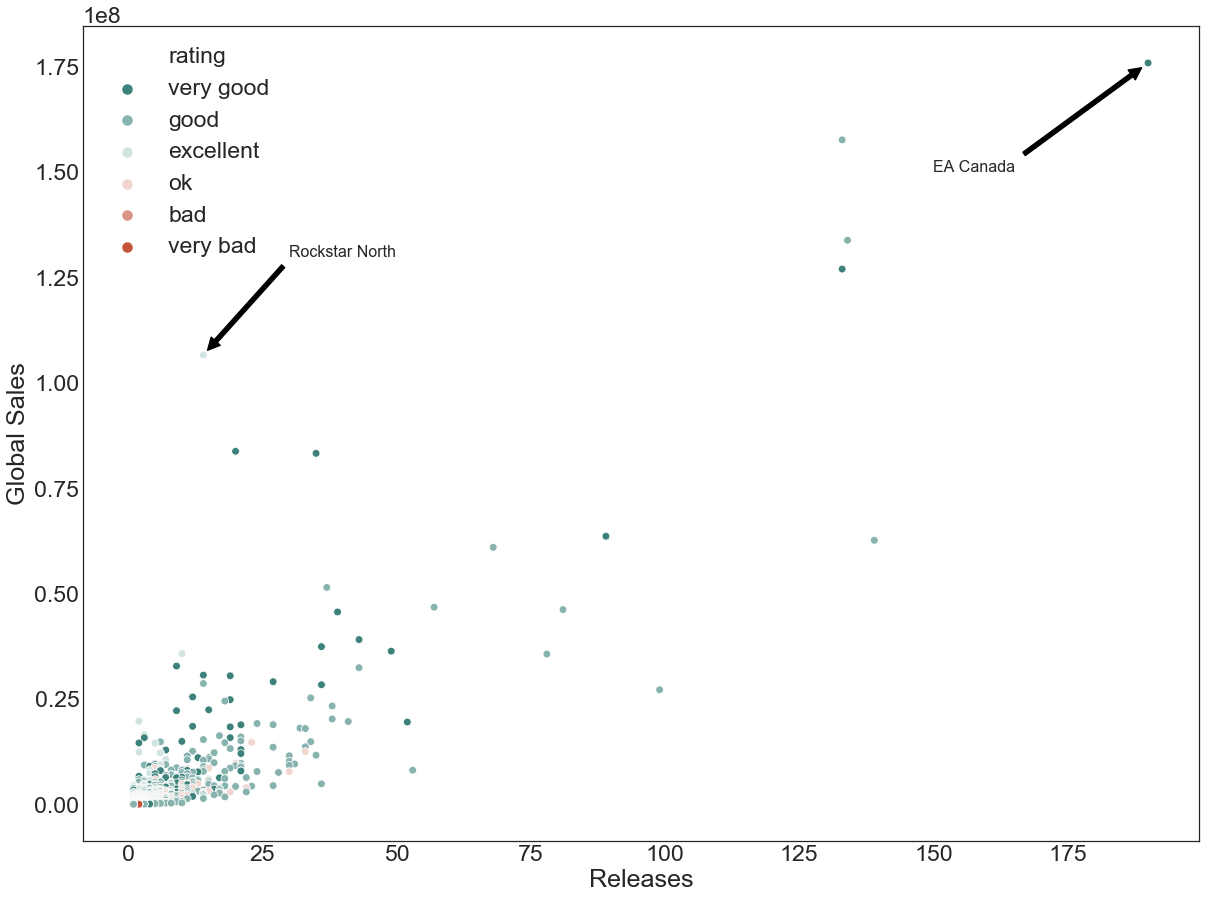

In [27]:
data=df4
plt.figure(figsize=(20,15))
colors=sns.diverging_palette(180, 20,n=6)
ax = sns.scatterplot(y ='Global Sales' , x = 'Releases', data=data,hue='rating',s=60,palette=colors)
ax.annotate('Rockstar North', xy=(14, 106630000.0), xytext=(30, 130000000.0),
           arrowprops=dict(facecolor='black', shrink=0.05,),fontsize=16)
ax.annotate('EA Canada', xy=(190, 175920000.0), xytext=(150, 150000000.0),
           arrowprops=dict(facecolor='black', shrink=0.05,),fontsize=16)
plt.show()

Develpers on Average seem to make games in the good (76-85) or verg good (86-100) category. EA Canada is the developer with the most Releases and global sales. Rockstar North is the developer that gets the most sales per release.

### **What is the most popular Platform.**

### **7th Genreation**

In [18]:
df5.groupby('platform').describe()

rank                                                               \
          count        mean         std   min    25%    50%      75%     max   
platform                                                                       
PS3       785.0  630.393631  544.795943   4.0  214.0  479.0   884.00  2994.0   
Wii       514.0  698.815175  541.834195   7.0  269.0  574.0   994.75  2505.0   
X360      853.0  704.566237  565.412089  10.0  257.0  571.0  1026.00  2954.0   

         na_sales                 ... meta_user_count         release_year  \
            count           mean  ...             75%     max        count   
platform                          ...                                        
PS3         785.0  396968.152866  ...           135.0  6080.0        785.0   
Wii         514.0  367937.743191  ...            28.0  1232.0        514.0   
X360        853.0  508534.583822  ...           137.0  8574.0        853.0   

                                                                         
                 mean       std     min     25%     50%     75%     max  
platform                                                                 
PS3       2010.654777  2.464401  2006.0  2009.0  2011.0  2012.0  2020.0  
Wii       2008.807393  1.706502  2006.0  2008.0  2009.0  2010.0  2018.0  
X360      2009.923798  2.526397  2005.0  2008.0  2010.0  2012.0  2018.0  

[3 rows x 88 columns]

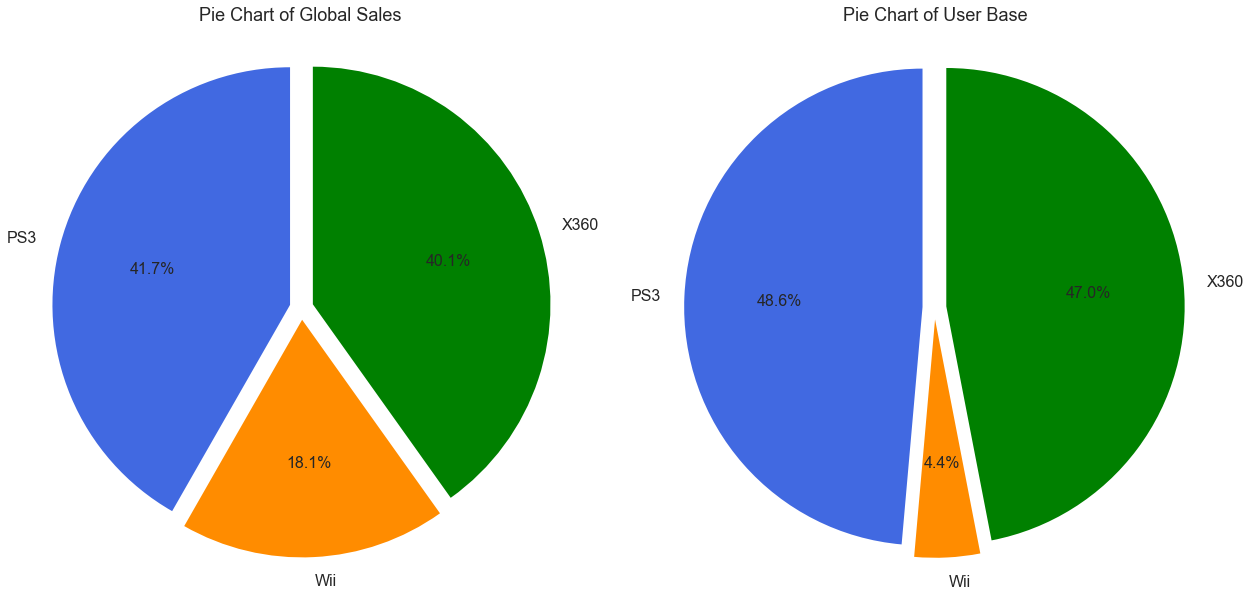

In [19]:
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['royalblue','darkorange','green']
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.pie(
   df5.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=df5.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales',fontsize=18)
plt.subplot(122)
plt.pie(
   df5.groupby('platform').meta_user_count.sum(),
    labels=df5.groupby('platform').meta_user_count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of User Base',fontsize=18)
plt.tight_layout()
plt.show()

From the pie charts above as well as the earlier barplots, it seems that both the PS3 and the XB360 were very evenly matched, with the XB360 having the slight edge in global sales. What is obvious is that from these metrics alone, the showing from the Wii could not compete against its other 2 competitors.

## **8th Generation**

In [20]:
df6.groupby('platform').describe()

rank                                                                \
          count        mean         std   min     25%    50%      75%     max   
platform                                                                        
PS4       567.0  862.862434  728.301300   6.0  261.50  674.0  1318.00  3003.0   
WiiU       90.0  660.100000  582.566002  17.0  238.25  480.0   958.25  2785.0   
XOne      355.0  915.802817  759.646908  13.0  281.50  710.0  1394.50  2927.0   

         na_sales                 ... meta_user_count          release_year  \
            count           mean  ...             75%      max        count   
platform                          ...                                         
PS4         567.0  251746.031746  ...           289.0  13657.0        567.0   
WiiU         90.0  149222.222222  ...           161.0   1681.0         90.0   
XOne        355.0  326394.366197  ...           178.5   4569.0        355.0   

                                                                         
                 mean       std     min     25%     50%     75%     max  
platform                                                                 
PS4       2016.502646  1.414055  2013.0  2016.0  2017.0  2018.0  2020.0  
WiiU      2013.755556  1.501393  2012.0  2013.0  2013.0  2015.0  2018.0  
XOne      2016.247887  1.461547  2013.0  2015.0  2016.0  2018.0  2018.0  

[3 rows x 88 columns]

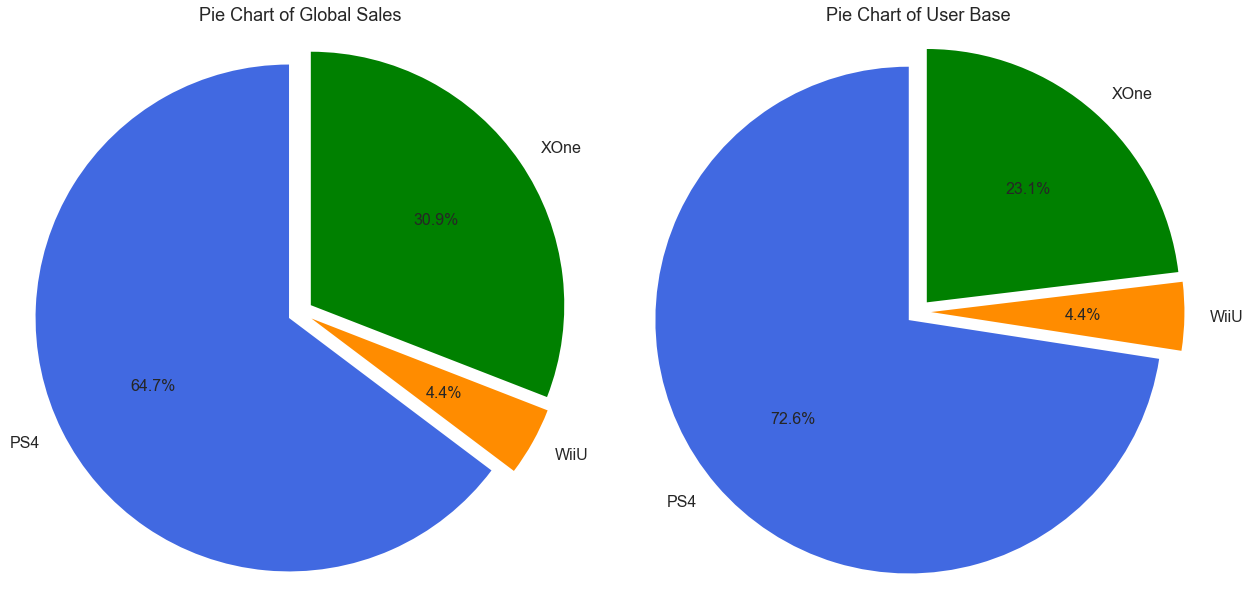

In [21]:
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['royalblue','darkorange','green']
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.pie(
   df6.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=df6.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales',fontsize=18)
plt.subplot(122)
plt.pie(
   df6.groupby('platform').meta_user_count.sum(),
    labels=df6.groupby('platform').meta_user_count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of User Base',fontsize=18)
plt.tight_layout()
plt.show()

Unlike the 7th Gen consoles, we have a very clear leader for the 8th Gen consoles, and that would be the PS4, far outstripping the XBOXONE and the WiiU. Although this console war is far from over, it is undoubted that the PS4 has a very big headstart

## **Conclusion**

* The number of Console game releases rose very quickly in the early 00's up until aboutv 2008. Since 2008/09 the number of releases have been decreasing. I think this is due to the increase in mobile gaming. A lot of developers are now, not only developing console games but also mobile games. In 2008 apple launched its app store and google launched the play store and as you can see from this graph, the number of console games decreased shorly after. This has caused the game sales to decrease, as there isnt as much games on the market and this could cause the console gaming industry decrease. Obviously this doesnt take into account console online subscriptions, console sales, in game purchases etc, so it isnt fair to say that the console industry in declining but it certainly looks to be declining in terms of game copies sold and may indicate that the future of console gaming isnt too bright. This surprised me a lot! Before I started this project I done a bit of research on the gsming industry and found that it was growing each year. But that is actually due to the hugh increases in mobile gameing each year. After discovering this, I done some more research and I found that many people beleive the console gaming industry is set to decline massively in the near future.
* Shooter games tend to get the most sales per releases while Sports games on average get the best rating.
* Games with a M (mature) ESRB rating  had the best average critic rating. This isn’t surprising as most, if not all critics would be in the mature age category and so may be a bit biased, although they’re job requires them to be as fair as possible. Mature also got the best sales per release which again isn’t surprising as people in this age category are more likely to be able to afford video games and don’t need permission from anyone to do so.
* Developers on average make good/very good games. I suppose thats how they stay in business. 
* The 7th genreation consle war was a draw between PS3 and Xbox 360 while the PS4 comprehensively won the 8th genreation war.